In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print("TensorFlow Version: ", tf.__version__)

TensorFlow Version:  2.9.2


In [52]:
mnist = tf.keras.datasets.mnist
# MNIST (Modified National Institue of Standarts)
# Veri tabanı, çeşitli görüntü işleme sistemlerini eğitmek için yaygın olarak kullanılan, elle yazılmış rakamların büyük bir veri tabanıdır

In [53]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
# Yüklenen veri train ve test olarak bölünür

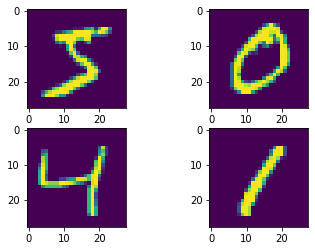

In [54]:
# Veri setinden bir kaç örnek
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(x_train[0])
axarr[0,1].imshow(x_train[1])
axarr[1,0].imshow(x_train[2])
axarr[1,1].imshow(x_train[3])

In [55]:
print("X_train Shape: {} \nY_train Shape: {}".format(x_train.shape, y_train.shape))

X_train Shape: (60000, 28, 28) 
Y_train Shape: (60000,)


In [56]:
print("Test Data Shape: {}".format(x_test.shape))

Test Data Shape: (10000, 28, 28)


In [57]:
x_train, x_test = x_train / 255.0, x_test / 255.0
# Veri seti içerisindeki değerler 8 bit kodlanan rgb değerler olduğu için 255'e bölünerek normalizasyon uygulandı
# Veri seti içerisindeki tam sayı değerleri float olarak dönüştürüldü

In [58]:
model = tf.keras.models.Sequential([ # Sıralı katman yığını.
    tf.keras.layers.Flatten(input_shape=(28,28)), # Ilk katman gırıs boyutunu alır ve flatten uygular. Ex: (None, 1, 10, 64) --> (None, 640).
    tf.keras.layers.Dense(128,activation='relu'), 
    # Relu genellikle ara katmanlarda kullanılan aktivasyon fonksiyonudur. 
    # (0,+sonsuz) arasında değerler alır. 
    # Daha hızlı çalışan bir aktivasyon fonksiyonu olması tercih sebebidir.
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation="softmax") # Output layer. 10 -> Toplam sınıf sayısı, bu ornekte 0,1,2,...,9 (toplam 10 adet)
    # Softmax genelde çıkış katmanında uygulanan bir sınıflayıcıdır. 
  # Sigmoid gibidir ancak 2 den fazla sınıflayıcı için kullanılabilir
])
model.output_shape

(None, 10)

In [59]:
model.compile(optimizer='adam', # Adam en güncel ve verimli optimizasyon algoritmalarındandır. Parametre(ağırlık) optimizasyonu için kullanılır
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) # Accuracy Veri seti içerisindeki toplam doğru sayısı / tüm tahmin

In [60]:
#Her örnek için model, her sınıf için bir tane olmak üzere bir logit vektörü veya log- ord skorları döndürür.
# Logit Vektörü:
"""
# Bir sınıflandırma modelinin ürettiği ve daha sonra normalleştirme işlevine geçirilen ham (normalleştirilmemiş) tahminlerin vektörü. 
# Model, çok sınıflı bir sınıflandırma problemini çözüyorsa, logitler tipik olarak softmax işlevi için bir girdi haline gelir. 
# Softmax işlevi daha sonra her olası sınıf için bir değere sahip (normalize edilmiş) bir olasılık vektörü üretir.
"""
# Log-Odds
"""
Olay bir ikili olasılık ise, o zaman olasılık, başarı olasılığının (p) başarısızlık olasılığına (1-p) oranını ifade eder. Örneğin, 
belirli bir olayın %90 başarı olasılığına ve %10 başarısızlık olasılığına sahip olduğunu varsayalım. 
Bu durumda oranlar şu şekilde hesaplanır:
                                            0.9/0.1 = 9
Log-odds, basitçe, oranların logaritmasıdır. Geleneksel olarak, "logaritma" doğal logaritmayı ifade eder, ancak logaritma aslında 1'den büyük herhangi bir taban olabilir. 
Geleneğe bağlı kalarak, örneğimizin log-oranları bu nedenle:
                                            ln(9) = 2.19722457734
"""

'\nOlay bir ikili olasılık ise, o zaman olasılık, başarı olasılığının (p) başarısızlık olasılığına (1-p) oranını ifade eder. Örneğin, \nbelirli bir olayın %90 başarı olasılığına ve %10 başarısızlık olasılığına sahip olduğunu varsayalım. \nBu durumda oranlar şu şekilde hesaplanır:\n                                            0.9/0.1 = 9\nLog-odds, basitçe, oranların logaritmasıdır. Geleneksel olarak, "logaritma" doğal logaritmayı ifade eder, ancak logaritma aslında 1\'den büyük herhangi bir taban olabilir. \nGeleneğe bağlı kalarak, örneğimizin log-oranları bu nedenle:\n                                            ln(9) = 2.19722457734\n'

In [61]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3035 - accuracy: 0.9108
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1461 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1099 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0904 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9759


In [62]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9779


[0.07073014974594116, 0.9779000282287598]

In [63]:
predictions = model(x_train[:1]).numpy()
predictions
# Model tahmin için verilen her bir giriş değerinin her bir sınıf için tahmin değerlerine dönüştürür

array([[4.7219177e-12, 1.5207936e-09, 1.4154338e-09, 4.2192042e-02,
        2.8064028e-16, 9.5780778e-01, 6.8813103e-13, 7.5948042e-10,
        1.9863642e-11, 6.8137005e-08]], dtype=float32)

In [71]:
model(x_test[:5]).numpy()

array([[1.03716708e-07, 1.45585917e-08, 7.35874210e-06, 1.12395326e-04,
        9.75284853e-10, 1.86137015e-07, 7.06695106e-14, 9.99877453e-01,
        5.22266191e-07, 1.84869384e-06],
       [1.71914678e-06, 2.18272744e-05, 9.99948621e-01, 2.36382803e-05,
        1.38047282e-11, 2.32965522e-06, 7.09753579e-07, 5.49719905e-12,
        1.22349979e-06, 2.33333231e-12],
       [3.12859243e-07, 9.98305678e-01, 3.23998538e-05, 3.00136867e-06,
        5.07213263e-05, 3.92216243e-05, 2.01113107e-05, 1.49380416e-03,
        5.32497652e-05, 1.52061045e-06],
       [9.99766648e-01, 2.09401593e-11, 1.00724268e-04, 1.37867539e-06,
        5.15863370e-08, 5.50173218e-06, 1.87719816e-05, 6.06308367e-06,
        6.53030099e-07, 1.00163990e-04],
       [9.23564528e-07, 2.55477373e-09, 1.37430170e-05, 1.82129654e-07,
        9.92122352e-01, 5.17645776e-06, 6.70251154e-07, 1.31166511e-04,
        5.28544524e-06, 7.72031816e-03]], dtype=float32)